<a href="https://colab.research.google.com/github/SaulArmeaga/MA1042/blob/main/equipo5actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Integrantes:

---





*   Gustavo Cruz García A0136931

*   Miranda Hernández Gutiérrez A01771479
*   Ana Cecilia Dotor García A01771630


*   Mónica Estrada Mondragón A01771629
*   Itzia Ximena Vázquez Hernández A01369786






#Contexto del proyecto

Contexto del proyecto: Accidentes de tránsito.
Se incluye un registro por persona implicada en el accidente.
En el año 2019 y posteriores:
La estructura de datos varía respecto a los años anteriores. El detalle de estas estructuras está disponible en el apartado 'Documentación Asociada'
No se incluyen registros de testigos
Los ficheros de 2010 a 2018 solo registran los accidentes con heridos o con daños al patrimonio municipal.
Los datos publicados son provisionales hasta seis meses después del año vencido.
Actualmente no se dispone de datos por barrio.
Este portal también ofrece dos conjuntos de datos con información relacionada como son:

Datos estadísticos de actuaciones de la Policía Municipal (incluye datos de atestados/partes de accidente por distrito y año)
Accidentes de tráfico con implicación de bicicletas

#Programa

#Lectura del archivo

Importamos las líbrerias necesarias

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargamos el archivo de drive


In [19]:
# Cargar el dataset desde un archivo
df_trafico= pd.read_excel('Accidentalidad (3).xlsx')
df_trafico


,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2022S000001,2022-01-01,01:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,NaN,NaN,443359.226,4472082.272,N,NaN
1,2022S000001,2022-01-01,01:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 45 a 49 años,Hombre,NaN,NaN,443359.226,4472082.272,N,NaN
2,2022S000002,2022-01-01,00:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,Hombre,NaN,NaN,441155.351,4474129.588,S,NaN
3,2022S000002,2022-01-01,00:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,Mujer,NaN,NaN,441155.351,4474129.588,N,NaN
4,2022S000002,2022-01-01,00:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Turismo,Conductor,De 40 a 44 años,Hombre,NaN,NaN,441155.351,4474129.588,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185263,2019S039993,2019-11-10,11:00:00,PLAZA. ELIPTICA / CALL. MARCELO USERA,1,12.0,USERA,Colisión lateral,Despejado,Turismo,Pasajero,De 60 a 64 años,Mujer,14.0,Sin asistencia sanitaria,439115.482,4470746.354,N,NaN
185264,2019S040001,2019-03-13,12:47:00,"CALL. ALFONSO FERNANDEZ CLAUSELLS, 7",7,9.0,MONCLOA-ARAVACA,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,Desconocido,Desconocido,NaN,NaN,438541.541,4479292.853,N,NaN
185265,2019S040001,2019-03-13,12:47:00,"CALL. ALFONSO FERNANDEZ CLAUSELLS, 7",7,9.0,MONCLOA-ARAVACA,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,Más de 74 años,Mujer,NaN,NaN,438541.541,4479292.853,N,NaN
185266,2019S040007,2019-11-03,10:10:00,"CALL. HALCONERO DEL REY, 0",0,11.0,CARABANCHEL,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 25 a 29 años,Mujer,NaN,NaN,438343.989,4468673.466,N,NaN


In [15]:
#drive.mount('/content/drive')

Identificamos datos NaN o no válidos o valores nulos


In [16]:
df_trafico.isna().sum()

num_expediente               0
fecha                        0
hora                         0
localizacion                 0
numero                       6
cod_distrito                 6
distrito                     6
tipo_accidente               4
estado_meteorológico     19459
tipo_vehiculo              663
tipo_persona                 3
rango_edad                   0
sexo                         0
cod_lesividad            83603
lesividad                83603
coordenada_x_utm            34
coordenada_y_utm            34
positiva_alcohol           652
positiva_droga          184745
dtype: int64

In [5]:
df_trafico['estado_meteorológico'].isna().sum()

19459

In [6]:
# Mostrar los valores nulos para cada campo
df_trafico['estado_meteorológico'][df_trafico['estado_meteorológico'].isna()]

2         NaN
3         NaN
4         NaN
14        NaN
51        NaN
         ... 
185217    NaN
185218    NaN
185243    NaN
185244    NaN
185250    NaN
Name: estado_meteorológico, Length: 19459, dtype: object

Crear gráfica de barras

In [7]:
conteo_sexo =df_trafico['sexo'].value_counts()
print(conteo_sexo)


Hombre         112089
Mujer           53487
Desconocido     19692
Name: sexo, dtype: int64


In [8]:
df_trafico['sexo'] = df_trafico['sexo'].replace('Desconocido', 'prefiere no contestar')
conteo_sexo =df_trafico['sexo'].value_counts()
print(conteo_sexo)


Hombre                   112089
Mujer                     53487
prefiere no contestar     19692
Name: sexo, dtype: int64


grafica de barras

Text(0.5, 1.0, 'sexo de las personas que tuvieron un accidente')

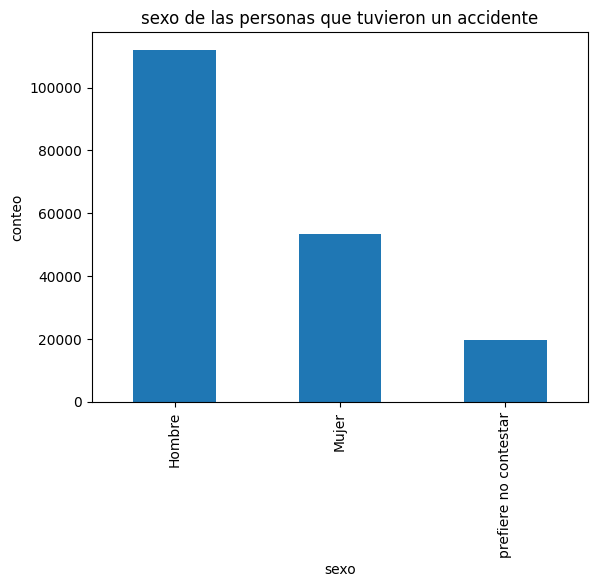

In [17]:
conteo_sexo.plot(kind='bar')
plt.xlabel('sexo')
plt.ylabel('conteo')
plt.title('sexo de las personas que tuvieron un accidente')

Estadística Básica para datos cuantitativos

In [10]:
print(df_trafico['cod_distrito'].mean())


9.894581727499434


In [11]:
print(df_trafico['cod_distrito'].median())

10.0


In [12]:
print('valor máximo:',df_trafico['cod_distrito'].max())
print('valor mínimo:',df_trafico['cod_distrito'].min())
valor_maximo = df_trafico['cod_distrito'].max()
valor_minimo = df_trafico['cod_distrito'].min()
rango = valor_maximo-valor_minimo
print('rango: ',rango)

valor máximo: 21.0
valor mínimo: 1.0
rango:  20.0


Promedio:  9.894581727499434
Media:  10.0
Rango:  20.0
Varianza:  31.803527874783086
Desviación Estándar:  5.6394616653350065
Valor máximo 21.0
Valor mínimo 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f4a48fcaf20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4a48fcb460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4a48fcac80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4a48fcb9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4a48fcbc40>],
 'means': []}

<Figure size 640x480 with 0 Axes>

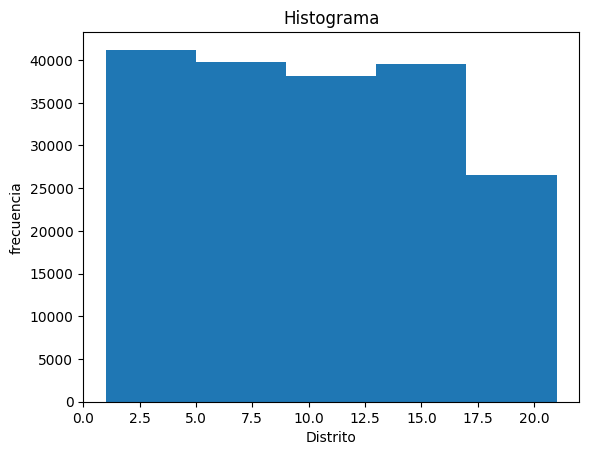

<Figure size 640x480 with 0 Axes>

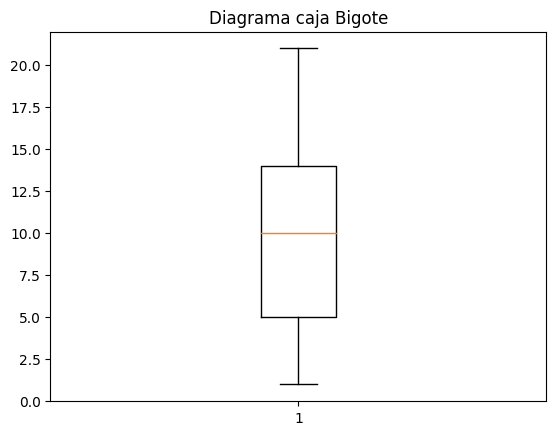

In [13]:
print('Promedio: ', df_trafico['cod_distrito'].mean())
print('Media: ', df_trafico['cod_distrito'].median())
rango = df_trafico['cod_distrito'].max () - df_trafico['cod_distrito'].min()
print('Rango: ', rango)
print('Varianza: ', np.var(df_trafico['cod_distrito']))
print('Desviación Estándar: ', np.std(df_trafico['cod_distrito']))
print('Valor máximo', df_trafico['cod_distrito'].max())
print('Valor mínimo', df_trafico['cod_distrito'].min())

#Histograma
Data = df_trafico.iloc[:,5]
plt.figure()
data = np.array(Data)
fig, ax = plt.subplots()
ax.set_title('Histograma')
ax.set_ylabel('frecuencia')
ax.set_xlabel('Distrito')
plt.hist(data,bins = 5)
plt.show

#Caja Bigote
plt.figure()
fig,ax = plt.subplots()
ax.set_title('Diagrama caja Bigote')
plt.boxplot(df_trafico['cod_distrito'].dropna())